#### **In this notebook, I perform various analysis and statistics to understand the market behaviour in betting, and help make decisions by the company focusing on certain events, countries and leagues.** 

In [0]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing


In [0]:
df = pd.read_csv('/Workspace/Users/deepak.guru.ganesan@volvo.com/leovegas/dataset_cleaned.csv').drop(['Unnamed: 0'], axis=1)

#### Top 15 Events to look out for

In [0]:
# Aggregate data: count number of bets for each event and league
heatmap_data = df.groupby(['eventName', 'league'])['number_of_bets'].sum().reset_index()

# Handling missing data by filling with 0s or dropping if necessary
heatmap_data.sort_values(by="number_of_bets", ascending=False).head(15)

,eventName,league,number_of_bets
5499,Cleveland Cavaliers - Orlando Magic,NBA,84572
13477,Milwaukee Bucks - Indiana Pacers,NBA,76878
16184,Philadelphia 76ers - New York Knicks,NBA,75580
14430,New York Knicks - Indiana Pacers,NBA,66748
13575,Minnesota Timberwolves - Dallas Mavericks,NBA,65008
10189,Indiana Pacers - Boston Celtics,NBA,64249
6603,Denver Nuggets - Minnesota Timberwolves,NBA,63002
3481,Boston Celtics - Cleveland Cavaliers,NBA,62526
13577,Minnesota Timberwolves - Denver Nuggets,NBA,56393
10210,Indiana Pacers - New York Knicks,NBA,55610


#### Top 15 Leagues wrt to Number of Bets made

In [0]:
heatmap_data_country_league = df.groupby(['event_country', 'league'])[['number_of_bets','total_turn_over_EUR']].sum().reset_index()
heatmap_data_country_league.sort_values(by="number_of_bets", ascending=False).head(15)

,event_country,league,number_of_bets,total_turn_over_EUR
267,USA,NBA,9945533,1.695683e+08
327,Unknown,NCAAB,1282587,2.397139e+07
302,Unknown,Euroleague,744576,1.678869e+07
46,China,CBA,535860,1.194440e+07
277,USA,WNBA,427888,1.244395e+07
232,South Korea,KBL,323843,7.764920e+06
192,Philippines,PBA,323567,9.722244e+06
39,Brazil,NBB,259861,6.443123e+06
239,Spain,Liga ACB,255942,6.510510e+06
12,Australia,NBL,248681,7.684671e+06


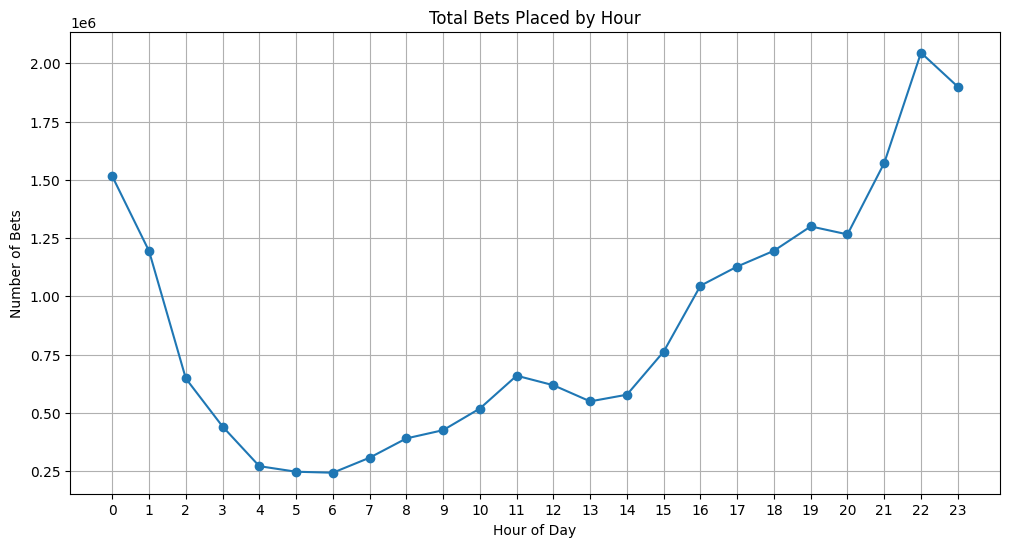

In [0]:
import matplotlib.pyplot as plt

df['bet_placement_hour'] = pd.to_datetime(df['bet_placement_hour'])

# Aggregate data by hour
hourly_bets = df.groupby(df['bet_placement_hour'].dt.hour)['number_of_bets'].sum().reset_index()

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(hourly_bets['bet_placement_hour'], hourly_bets['number_of_bets'], marker='o')
plt.title('Total Bets Placed by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Bets')
plt.xticks(range(0, 24))
plt.grid()
plt.show()

#### Identifying the least engaging hours of the day

In [0]:
# Calculate mean and standard deviation
mean_bets = hourly_bets['number_of_bets'].mean()
std_bets = hourly_bets['number_of_bets'].std()

# Calculate z-scores
hourly_bets['Z-Score'] = (hourly_bets['number_of_bets'] - mean_bets) / std_bets

# Identify least engaging times (e.g., z-score < -1)
least_engaging_times = hourly_bets[hourly_bets['Z-Score'] < -1]
print(least_engaging_times[['bet_placement_hour', 'number_of_bets', 'Z-Score']])

   bet_placement_hour  number_of_bets   Z-Score
4                   4          271268 -1.117777
5                   5          247416 -1.162475
6                   6          243164 -1.170443
7                   7          307607 -1.049678


#### Z score validation for the result

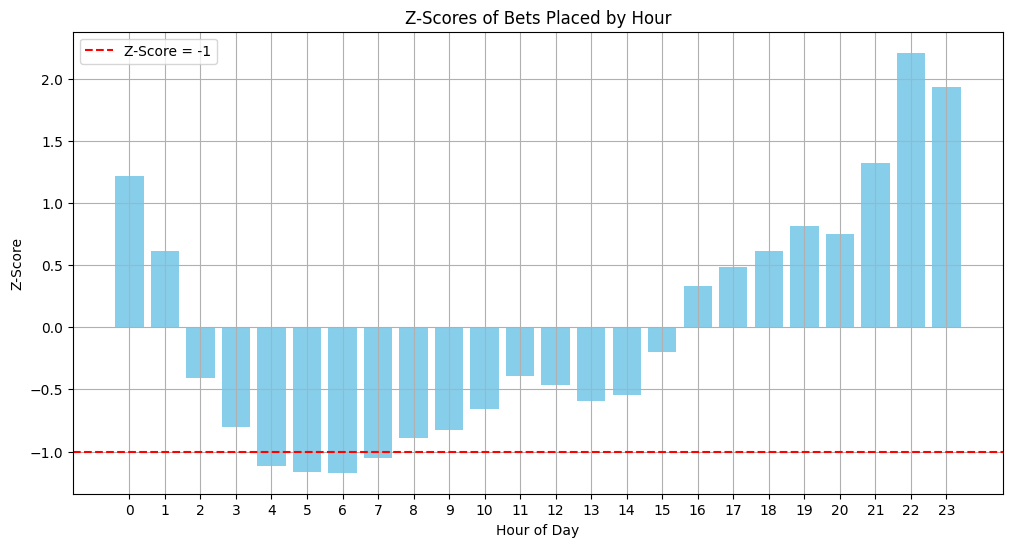

In [0]:
plt.figure(figsize=(12, 6))
plt.bar(hourly_bets['bet_placement_hour'], hourly_bets['Z-Score'], color='skyblue')
plt.axhline(y=-1, color='red', linestyle='--', label='Z-Score = -1')
plt.title('Z-Scores of Bets Placed by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Z-Score')
plt.xticks(range(0, 24))
plt.legend()
plt.grid()
plt.show()

**Based on this graph, we can say that hours 4,5,6,7 are below Z-threshold of -1 which is in the left most tail of the normal distribution curve. This denotes that these hours are least engaging.**

#### Turn Over Statistics in Euros for Live vs Prematch Betting

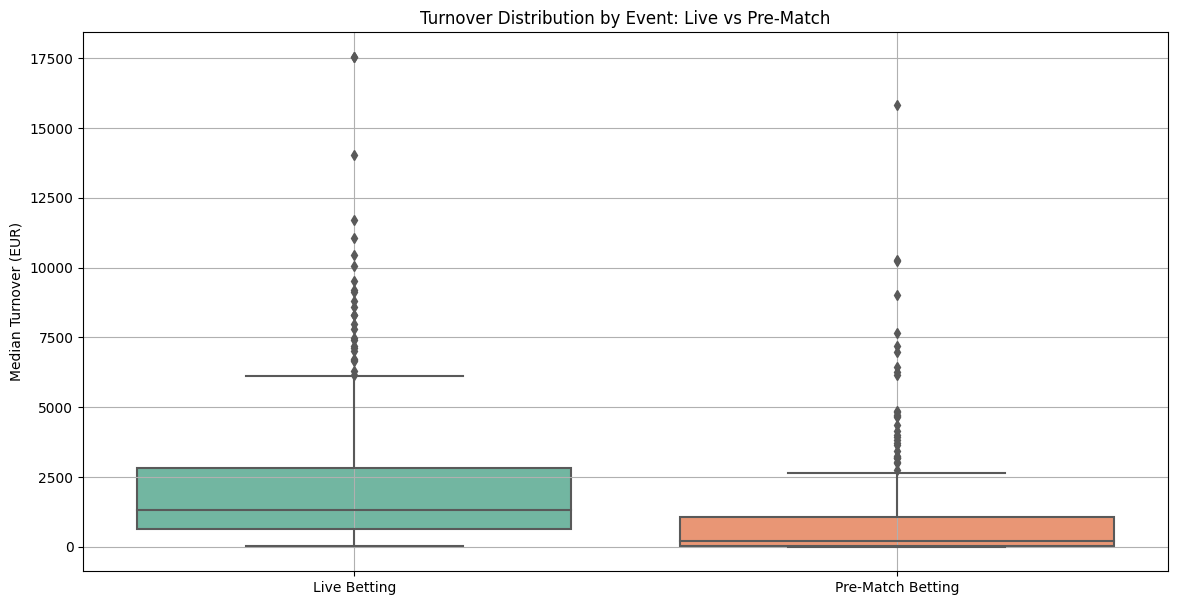

Summary Statistics for Turnover Comparison:


,league,Mean_Turnover_Live,Median_Turnover_Live,Mean_Turnover_Pre_Match,Median_Turnover_Pre_Match
203,Olympic Qualification,23747.084401,17528.762247,2228.718587,51.027480
174,NBA,18615.828512,11061.290107,3221.697451,261.088982
107,FIBA World Cup (W) Qualification,18013.956476,11710.573457,2872.844636,64.098072
175,NBA All Star Game,17553.324309,17553.324309,3533.716243,126.943404
105,FIBA South American Championship (W),17130.159597,8794.269837,2231.905914,43.071747
258,WNBA All-Star Weekend,14017.827737,14017.827737,404.868138,46.274785
257,WNBA,13243.957634,9115.824908,1212.613220,49.554509
85,Euroleague,13115.681923,9536.221147,927.591005,37.379820
227,Supercopa,12800.321971,10056.285220,1842.904541,132.484237
255,WCBA (W),12572.593680,8287.862609,11953.280005,7649.125386


In [0]:
import seaborn as sns
# Convert 'Bet_placement_hour' and 'eventStartDate' to datetime
df['eventStartDate'] = pd.to_datetime(df['eventStartDate'])

# Create a new column to identify live bets
df['is_live_bet'] = df['bet_placement_hour'] >= df['eventStartDate']

# Separate live and pre-match bets
live_bets = df[df['is_live_bet']]
pre_match_bets = df[~df['is_live_bet']]

# 1. Aggregate Turnover by Event
live_turnover_by_event = live_bets.groupby('league')['total_turn_over_EUR'].agg(['mean', 'median', 'std', 'sum']).reset_index()
pre_match_turnover_by_event = pre_match_bets.groupby('league')['total_turn_over_EUR'].agg(['mean', 'median', 'std', 'sum']).reset_index()

# Rename columns for clarity
live_turnover_by_event.rename(columns={'mean': 'Mean_Turnover_Live', 'median': 'Median_Turnover_Live', 
                                        'std': 'Std_Turnover_Live', 'count': 'Sum_Live'}, inplace=True)
pre_match_turnover_by_event.rename(columns={'mean': 'Mean_Turnover_Pre_Match', 'median': 'Median_Turnover_Pre_Match', 
                                            'std': 'Std_Turnover_Pre_Match', 'count': 'Sum_Pre_Match'}, inplace=True)

# Merge both dataframes on eventName
turnover_comparison = pd.merge(live_turnover_by_event, pre_match_turnover_by_event, on='league', how='outer')

# 2. Visualize Turnover Distributions
plt.figure(figsize=(14, 7))
sns.boxplot(data=turnover_comparison[['Median_Turnover_Live', 'Median_Turnover_Pre_Match']], palette='Set2')
plt.title('Turnover Distribution by Event: Live vs Pre-Match')
plt.ylabel('Median Turnover (EUR)')
plt.xticks(ticks=[0, 1], labels=['Live Betting', 'Pre-Match Betting'])
plt.grid()
plt.show()

# 3. Summary Statistics
print("Summary Statistics for Turnover Comparison:")
turnover_comparison.sort_values(['Mean_Turnover_Live', 'Mean_Turnover_Pre_Match'],ascending=False)[['league', 'Mean_Turnover_Live', 'Median_Turnover_Live', 'Mean_Turnover_Pre_Match', 'Median_Turnover_Pre_Match']].head(15)


Even though the data is skewed for Live vs Prematch, the median and mean turnover during the live match seems to be more than pre match. This shows that more people involve during live match and they like dynamic momentum of the game, and put more stakes during the game. Most people, instead of taking pre match decisions, studying the game and analysis, instead prefer to bet live.